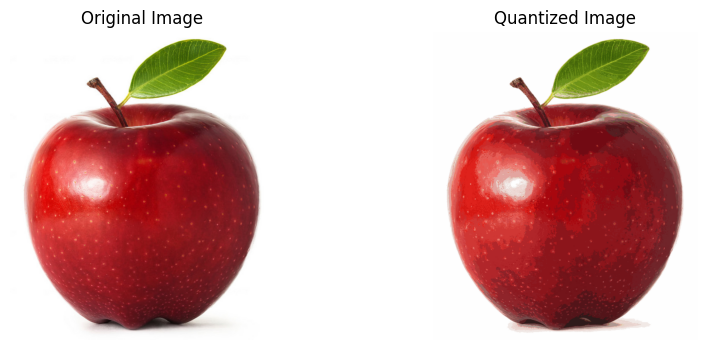

In [7]:
import random
from PIL import Image
import matplotlib.pyplot as plt  # For visualization
import os

def random_color_quantization(image):
    """
    Reduce the number of colors in the image to the specified amount.

    Parameters:
    - image: PIL Image object
    - num_colors: The desired number of colors in the quantized image

    Returns:
    - Quantized PIL Image object
    """

    # Convert the image to RGBA mode to handle transparency
    num_colors = random.randint(64, 256)

    image = image.convert('RGBA')

    # Create a palette using k-means clustering
    palette = image.quantize(colors=num_colors).getpalette()

    # Apply the palette to the image (CORRECTED LINE)
    quantized_image = image.quantize(colors=num_colors)  # Use the palette directly

    return quantized_image

# Example Usage
image_path = "data/apple/apple_1.jpg"
original_image = Image.open(image_path)

# Apply random color quantization
quantized_image = random_color_quantization(original_image)

# Display the original and quantized images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Quantized Image")
plt.imshow(quantized_image)
plt.axis("off")

plt.show()

In [8]:
def save_quantized_images(folder, image_path, image_order, num_quantizations=5):
    # Create a new folder for quantized images
    quantization_folder = os.path.join(folder, "quantization")
    os.makedirs(quantization_folder, exist_ok=True)

    # Load the original image
    original_image = Image.open(image_path)

    # Apply quantization augmentations and save the images
    for i in range(1, num_quantizations + 1):
        # Apply random color quantization
        augmented_image = random_color_quantization(original_image)
        augmented_image = augmented_image.convert("RGB")
        # Save the quantized image
        augmented_image_path = os.path.join(quantization_folder, f"{image_order}_quantized_{i}.jpg")
        augmented_image.save(augmented_image_path)


In [9]:
fruits = ["apple", "banana", "carrot", "cherry", "coconut", "cucumber", "grapefruit", "kiwi",
    "melon", "pear", "pineapple", "plum", "tomato", "watermelon"]

In [10]:
import os

def count_images_in_folder(folder_path, image_extensions=['.jpg', '.jpeg', '.png', '.gif', '.bmp']):
    image_count = 0

    # Check if the folder exists
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        # List all files in the folder
        files = os.listdir(folder_path)

        # Count the image files
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
    else:
        print(f"The folder {folder_path} does not exist.")

    return image_count

In [11]:
for fruit in fruits:
    # Path to the folder containing the images
    folder_path = f"data/{fruit}"

    # Count the number of images in the folder
    count = count_images_in_folder(folder_path)

    for i in range(1, count+1):
        image_path = f"data/{fruit}/{fruit}_{i}.jpg"
        save_quantized_images(folder_path, image_path, i)